# Homework 2: Mapping
## Bailey Jørgensen

Github repository link: https://github.com/jorb1/eds-296-bigdata

1: Using the CMIP6 database hosted on Amazon Web Services, choose any two models you
like: use both their historical simulations and future projections from one of the four major
SSPs (ssp126, ssp245, ssp370, or ssp585). Provide a brief description of the models and
scenarios you chose to include.

In [1]:
# Load packages
import xarray as xr
import matplotlib.pyplot as plt
import intake
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds296-stevenson/share/proj failed


In [2]:
# Access the catalog
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [3]:
# Let's pick two models! Both of these are also listed on the CMIP6 webpage, under the ocean ensemble
res_test = catalog.search(activity_id=['ScenarioMIP', 'CMIP'], experiment_id=['historical', 'ssp585'], source_id='CanESM5').df
res_test1 = catalog.search(activity_id=['ScenarioMIP', 'CMIP'], experiment_id=['historical', 'ssp585'], source_id='CESM2').df

I chose the CanESM5, the Canadian Earth System Model version 5, and thge CESM2, the Community Earth System Model version 2. The two scenarios I chose were historical, so I could utilize data from the past, and the SSP5-8.5 scenario, which is a high-emission future scenario from the SSP framework, which predicts that green house gases will remain high and result in significant warming. I wanted to look at the results from that model in order to see how these "worse-case scenario" choices might effect my region of choice, which is an island nation exposed to the effects that climate change will have on the ocean.

2: Access information from your chosen models and scenario, for any climate variable you like;

I chose to look at Sea Surface Temperature from the OMON oceans table.

In [4]:
# Ok, we know the models will match now - now lets make sure the ensemble #s match too (aka member IDs)
# Extract the member_id columns from both dataframes
members_res = set(res_test['member_id'])
members_res1 = set(res_test1['member_id'])

# Find the intersection
common_members = members_res.intersection(members_res1)

# Make a four loop to check if there are matching member_ids
if common_members:
    print("Matching member_id(s) found:", common_members)
else:
    print("No matching member_id(s) found.")

Matching member_id(s) found: {'r10i1p1f1', 'r3i1p1f1', 'r8i1p1f1', 'r5i1p1f1', 'r7i1p1f1', 'r1i1p1f1', 'r4i1p1f1', 'r2i1p1f1', 'r11i1p1f1', 'r9i1p1f1', 'r6i1p1f1'}


In [5]:
# For homework 1, I defined the search terms within my search. This time, I want to do it separately
# since I think it will help me play with the data a little easier

# Set the timeframe search term for hist(history) and fut(future)
activityid_hist = ['CMIP']
activityid_fut = ['ScenarioMIP']

# Set the experiment IDs for hist(history) and fut(future) for the 585 scenario
experimentid_hist = ['historical']
experimentid_fut = ['ssp585']

# Set memberid
member_id = ['r11i1p1f1']

# Set tableid variable, which is the oceans table
table_id = ['Omon']

# Set the variable id, which where i can find sea surface temperature 
variable_id = ['tos']

# Set a variable for CANESM5
sourceid_can = ['CanESM5']

# Set a variable for CESM2
sourceid_ces = ['CESM2']

In [6]:
# Now, I will search through the catalog and create variables for each models results

# First up is the CanESM5 model, historical edition
res_can_hist = catalog.search(
    activity_id = activityid_hist,
    source_id = sourceid_can,
    experiment_id = experimentid_hist,
    member_id = member_id,
    table_id = table_id,
    variable_id = variable_id
)

# Next up is CanESM5, future edition
res_can_fut = catalog.search(
    activity_id = activityid_fut,
    source_id = sourceid_can,
    experiment_id = experimentid_fut,
    member_id = member_id,
    table_id = table_id,
    variable_id = variable_id)

# Now, Cesm2 historical model
res_ces_hist = catalog.search(
    activity_id = activityid_hist,
    source_id = sourceid_ces,
    experiment_id = experimentid_hist,
    member_id = member_id,
    table_id = table_id,
    grid_label = ['gn'] , # Filters for regridded data only
    variable_id = variable_id)

# Followed by Cesm2 future model
res_ces_fut = catalog.search(
    activity_id = activityid_fut,
    source_id = sourceid_ces,
    experiment_id = experimentid_fut,
    member_id = member_id,
    table_id = table_id,
    variable_id = variable_id) 

In [7]:
# Take a look at each of these models in dataframe format to make sure it all looks good
display(res_can_hist.df)
display(res_can_fut.df)
display(res_ces_hist.df)
display(res_ces_fut.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r11i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,CCCma,CanESM5,ssp585,r11i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r11i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190514


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528


NOTE: I noticed I was having a problem with one of the historical scenarios having multiple rows in the dataframe generated. I used the code below to find out where the issue with the duplication was. Then, I modified my search so that the grid_labels also match across each of the catalog searches. 

In [8]:
# Looking for discrepancies between variables - saw the two different grid labels
# Now that the variable is filtered for just one grid_label, it now shows just 
# one data frame row
display(res_ces_hist.df[['member_id', 'experiment_id', 'grid_label', 'version']])

,member_id,experiment_id,grid_label,version
0,r11i1p1f1,historical,gn,20190514


In [9]:
# Store the dataframes as their z-store variables

# CANESM5 variables being defined:
hist_can = xr.open_zarr(res_can_hist.df['zstore'][0], storage_options={'anon': True})
fut_can = xr.open_zarr(res_can_fut.df['zstore'][0], storage_options={'anon': True})

# And now the CESM2 variables being defined
hist_ces = xr.open_zarr(res_ces_hist.df['zstore'][0], storage_options={'anon': True})
fut_ces = xr.open_zarr(res_ces_fut.df['zstore'][0], storage_options={'anon': True})


In [10]:
# This is a step I missed in homework one, so this time I'm going to...
# Concatenate the historic and future dataframes from the different models together!

# First for CANESM5
can_data = xr.concat([hist_can, fut_can], dim="time")

# And then for CESM2
ces_data = xr.concat([hist_ces, fut_ces], dim="time")

**3:** Choose a region that you’re interested in to analyze, anywhere in the world. This should be a
region that’s fairly large - think, the size of a large country or a sizable fraction of a
continent. As you did for HW1, describe in markdown text some aspects of the climate of
your region: what are the interesting features there, and how might you expect that climate
change would impact the area?

For this project, I again chose the Philippine Islands! The Philippine Islands are urban, tropical islands, located in an area of unique biodeiveristy and located along several major shipping routes. I would expect over time that rising sea temperatures would have effects on the coral and other unique undersea life forms here. I would also imagine that these rising sea temperatures would increase the intensity of the tropical storms that impact the lives of the humans living there, as well as trade and commerce of the shipping lanes.

**4:** Choose two separate time periods, each 30-50 years in length, and describe briefly why you
chose these periods: then make some maps of the time average of your selected variable.

I chose these times:

- historical (1850-2015)
- historical plus future (1850-2100)

Because they are the time frames that we used for homework one. I thought it would be really interesting to be able to compare the maps that I generate here with the graphs that I generated in homework one, for two different views these climate change scenarios.

a. Map the average over each time period separately

In [11]:
# Define the area of the Philippines (and some of the surrounding waters) with lat long
phil = [(115.0 + 360) % 360, (128.0 + 360) % 360, 3.0, 21.0] # Convert longitude to match the modles wrapped longitude values

# Define the time periods
hist = [1850, 2015]
fut = [2050, 2080]

# Something I almost missed - gotta convert those time periods into date time so that they
# overlap well with the defined time periods
can_data['time'] = can_data.time.astype('datetime64[ns]')
ces_data['time'] = ces_data.time.astype('datetime64[ns]')

In [12]:
# Add the time periods to the dataframes, using a slice method...
# First for CANESM5 
can_time_hist = can_data.sel(time=slice(str(hist[0])+"-01-01", str(hist[1])+"-12-31"))
can_time_fut = can_data.sel(time=slice(str(fut[0])+"-01-01", str(fut[1])+"-12-31"))

# Then for CESM2
ces_time_hist = ces_data.sel(time=slice(str(hist[0])+"-01-01", str(hist[1])+"-12-31"))
ces_time_fut = ces_data.sel(time=slice(str(fut[0])+"-01-01", str(fut[1])+"-12-31"))

In [13]:
# Lets calculate the averates for time periods definied 
# And a pro tip from class - convert the temp to Celsius!

# First for CANESM5
can_hist_avg = can_time_hist.mean(dim="time") - 273.15
can_fut_avg = can_time_fut.mean(dim="time") - 273.15

# Then for CESM2
ces_hist_avg = ces_time_hist.mean(dim="time") - 273.15
ces_fut_avg = ces_time_fut.mean(dim="time") - 273.15

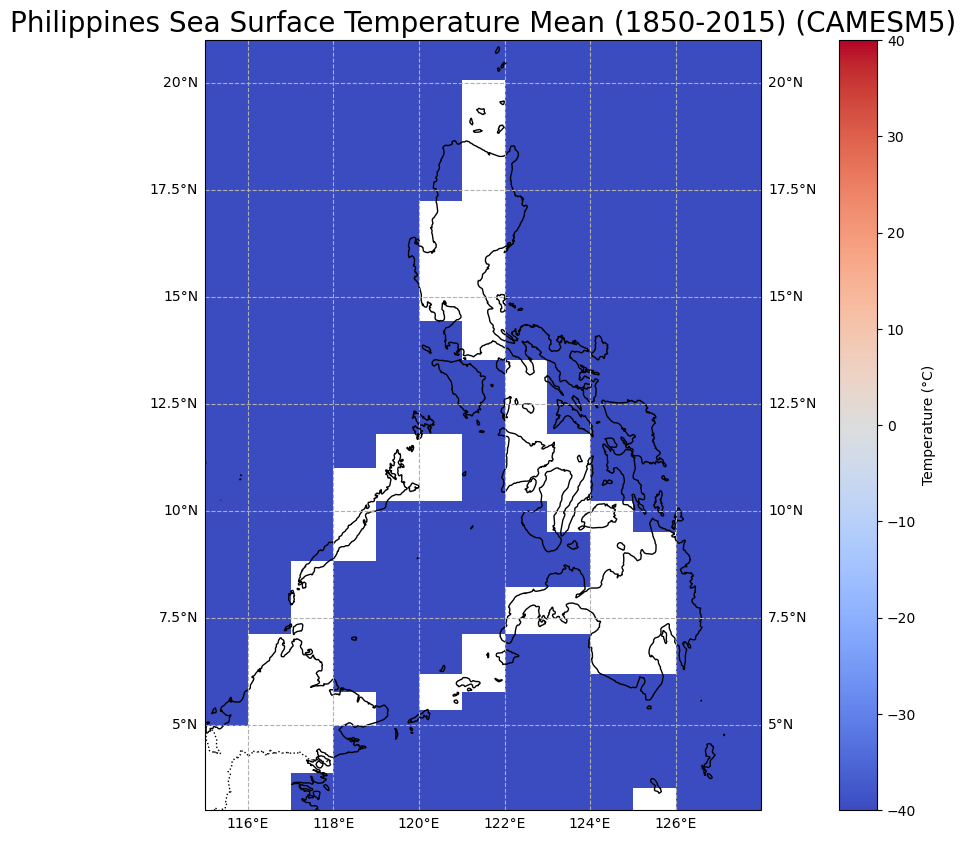

In [14]:
# Map of historical CANESM5

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(can_hist_avg.longitude, 
                     can_hist_avg.latitude, 
                     can_hist_avg["tos"], 
                     transform=map, 
                     cmap="coolwarm", 
                     vmin=-40, 
                     vmax=40)

# Set spatial extent of plot
ax.set_extent(phil, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False

# Add title, show plot
ax.set_title("Philippines Sea Surface Temperature Mean (1850-2015) (CAMESM5)", fontsize= 20)
plt.show()

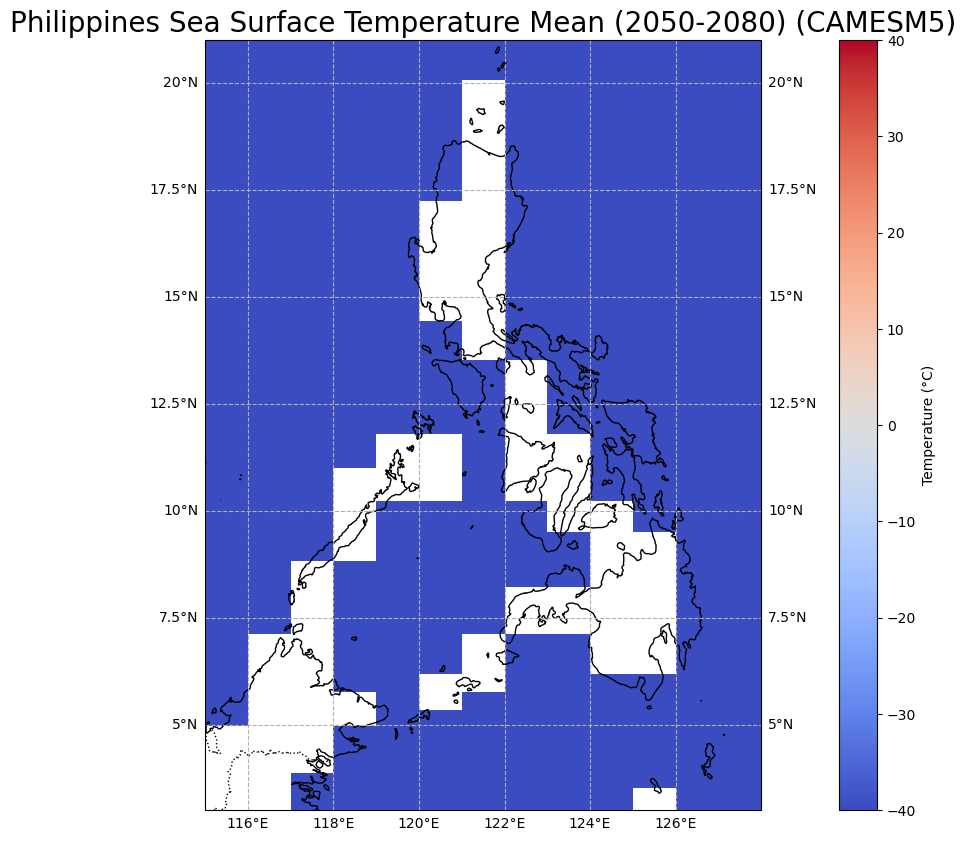

In [15]:
# CANESM5 Future

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(can_fut_avg.longitude, # This model is i j gridded, so its the full word
                     can_fut_avg.latitude,  # instead of just lat lon, unlike the other model run
                     can_fut_avg["tos"], 
                     transform=map, 
                     cmap="coolwarm", 
                     vmin=-40, 
                     vmax=40)

# Set spatial extent of plot
ax.set_extent(phil, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False

# Add title, show plot
ax.set_title("Philippines Sea Surface Temperature Mean (2050-2080) (CAMESM5)", fontsize= 20)
plt.show()

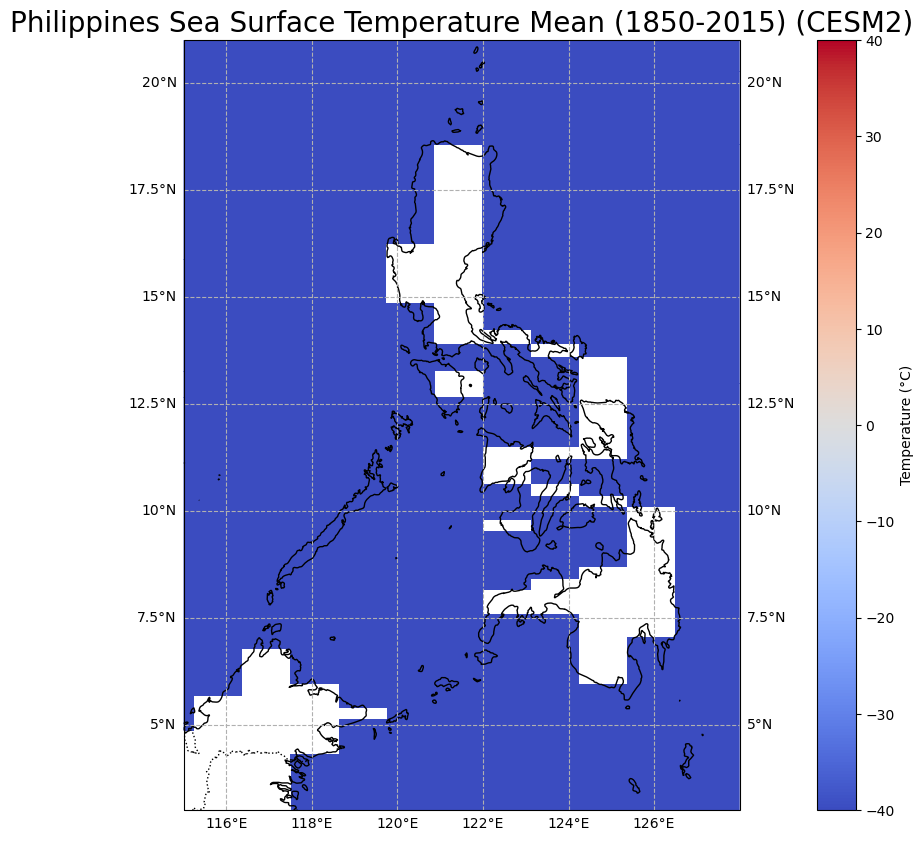

In [16]:
# CESM2 1960-1990

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(ces_hist_avg.lon, 
                     ces_hist_avg.lat, 
                     ces_hist_avg["tos"], 
                     transform=map, 
                     cmap="coolwarm", 
                     vmin=-40, 
                     vmax=40)

# Set spatial extent of plot
ax.set_extent(phil, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False

# Add title, show plot
ax.set_title("Philippines Sea Surface Temperature Mean (1850-2015) (CESM2)", fontsize= 20)
plt.show()

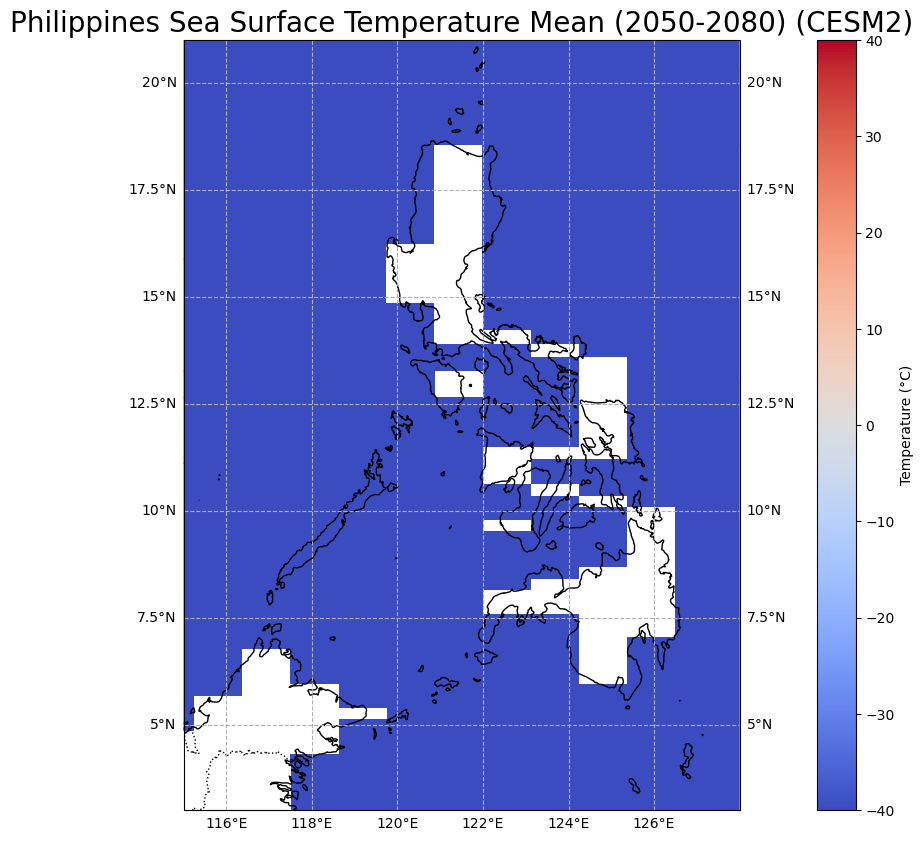

In [17]:
# CESM2 2050-2080

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(ces_fut_avg.lon, 
                     ces_fut_avg.lat, 
                     ces_fut_avg["tos"], 
                     transform=map, 
                     cmap="coolwarm", 
                     vmin=-40, 
                     vmax=40)

# Set spatial extent of plot
ax.set_extent(phil, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False

# Add title, show plot
ax.set_title("Philippines Sea Surface Temperature Mean (2050-2080) (CESM2)", fontsize= 20)
plt.show()

Well, these maps all look really similar to me... lets see if PART B, mapping the averages between the two time periods, clears some stuff up for me.

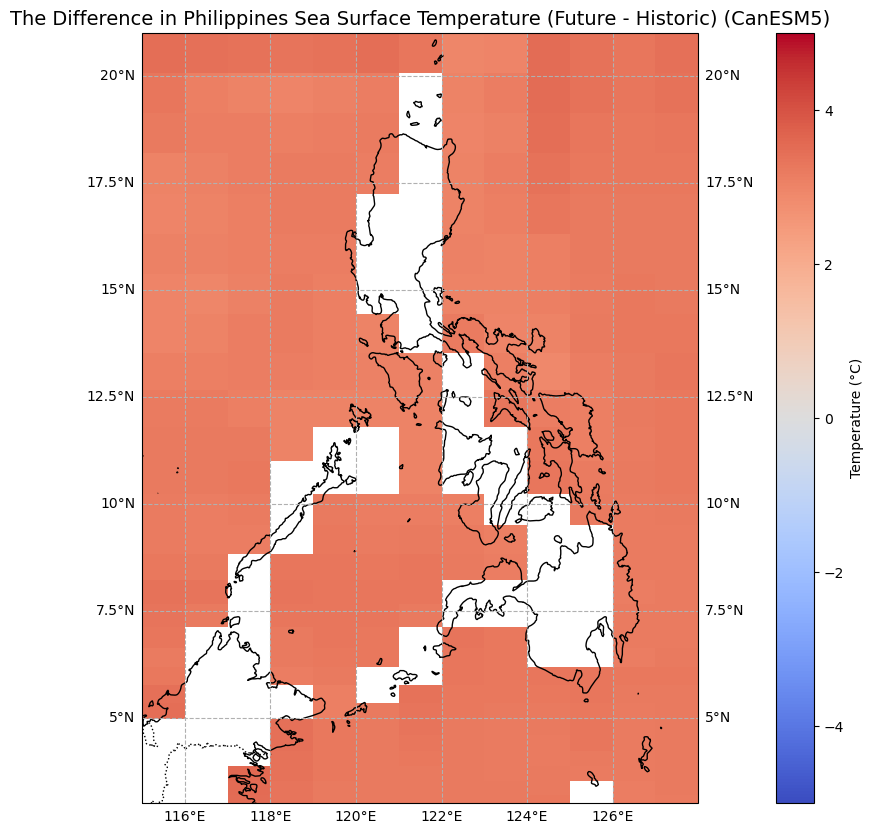

In [25]:
# Lets start again with CANESM5

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(can_fut_avg.longitude, 
                     can_fut_avg.latitude, 
                     can_fut_avg.tos.values - can_hist_avg.tos.values, 
                     transform=map, cmap="coolwarm", vmin=-5, vmax=5)

# Set spatial extent of plot
ax.set_extent(phil, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False

# Add title, show plot
ax.set_title("The Difference in Philippines Sea Surface Temperature (Future - Historic) (CanESM5)", fontsize= 14)
plt.show()

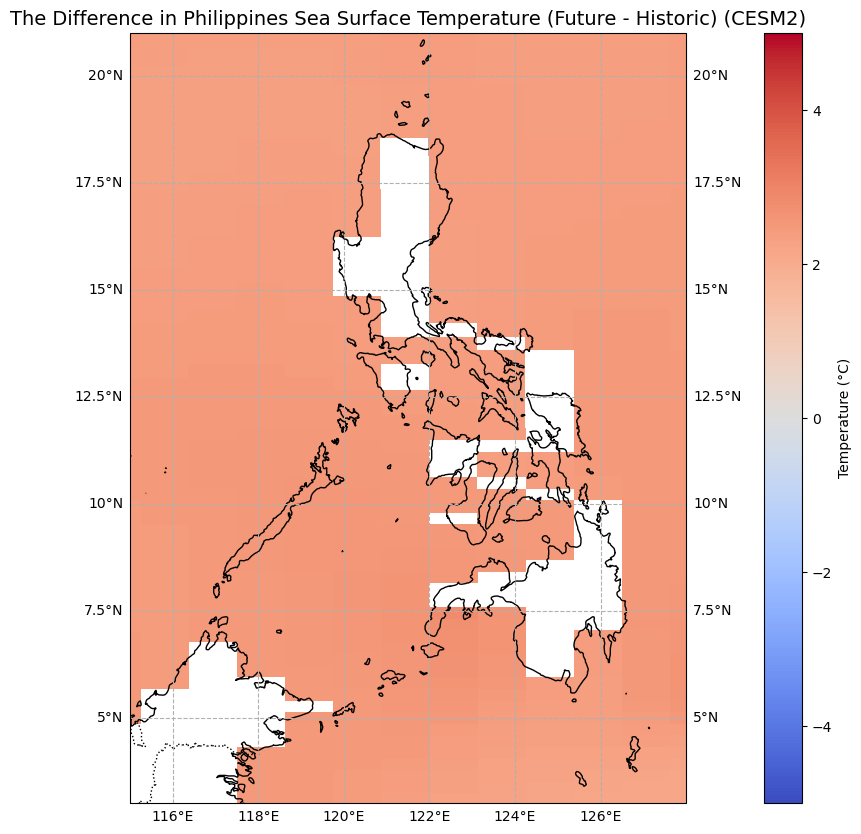

In [26]:
# Now lets look at CESM2...

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(ces_fut_avg.lon, 
                     ces_fut_avg.lat, 
                     ces_fut_avg.tos.values - ces_hist_avg.tos.values, 
                     transform=map, cmap="coolwarm", vmin=-5, vmax=5)

# Set spatial extent of plot
ax.set_extent(phil, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False

# Add title, show plot
ax.set_title("The Difference in Philippines Sea Surface Temperature (Future - Historic) (CESM2)", fontsize= 14)
plt.show()

5: Results

With the smaller values being calculated by the difference plot, I had to adjust the vmin and vmax on the color scale to make the gradient more readable. In addition, because the Sea Surface Temperature is in the negative numbers in Celsius, to make these plots I am subtracting two negative numbers, which is resulting in the difference plots being red instead of blue, which might be a little misleading when discussing temperature. Regardless, it is much easier to see th changes between the two models, the historic and future, when looking at their differences. 

Interestingly, there doesn't seem to be much color gradient differences between the regions. There might be a slightly bigger difference further out at sea in the CanESM5 model, where I can see a little bit more variation across the space. But by and large, the color change is pretty uniform across the country. 

The predictive model CanESM5 shows a much larger difference in temperature between historic times, and a predicted future where we remain at high emissions and extreme warming events. Increasing sea surface temperature can have a huge effect on the many rare and beautiful corals in the Philippines, and the potenetial for this to increase the severity of storms puts the people on the islands at great risk. Not to mention, many people make their living on the sea, fishing or otherwise, and increasing sea surface temperature in a world where we do not reduce carbon emissions sufficiently would put these livelihoods at risk. 
